In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp
import seaborn as sns

In [2]:
lgbt = pd.read_csv(r"C:\Users\ibrom\Documents\SAMPLE DATASET\LGBT_Survey.csv")

#checking for dulpicates
lgbt[lgbt.duplicated()]

,CountryCode,subset,question_code,question_label,answer,percentage,notes


In [3]:
#checking for missing values
lgbt[lgbt.isnull()].sum()

CountryCode       0.0
subset            0.0
question_code     0.0
question_label    0.0
answer            0.0
percentage        0.0
notes             0.0
dtype: float64

In [4]:
#seems we are good to go
#lets have a look at our data set
lgbt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34020 entries, 0 to 34019
Data columns (total 7 columns):
CountryCode       34020 non-null object
subset            34020 non-null object
question_code     34020 non-null object
question_label    34020 non-null object
answer            34020 non-null object
percentage        34020 non-null object
notes             15296 non-null object
dtypes: object(7)
memory usage: 1.8+ MB


In [5]:
lgbt.describe()

,CountryCode,subset,question_code,question_label,answer,percentage,notes
count,34020,34020,34020,34020,34020,34020,15296
unique,29,5,52,50,59,102,2
top,Germany,Gay,g5,For each of the following types of discriminat...,Don`t know,1,[0]
freq,1184,7205,1412,1450,4545,2310,13447


In [6]:
#lets have a summary of our categorical variables
lgbt.head()

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8,NaN
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34,NaN
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45,NaN
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9,NaN
4,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Don`t know,4,[0]


In [7]:
rp.summary_cat(lgbt[['CountryCode','subset','answer', 'question_label']])

,Variable,Outcome,Count,Percent
0,CountryCode,Germany,1184,3.48
1,,Spain,1184,3.48
2,,Average,1184,3.48
3,,Poland,1184,3.48
4,,Netherlands,1181,3.47
...,...,...,...,...
138,,Have you ever moved to an EU country (and also...,294,0.86
139,,Do any children (under the age of 18) live in ...,290,0.85
140,,Is someone in the household a parent or legal ...,290,0.85
141,,Are you a parent or legal guardian of a child ...,290,0.85


In [8]:
#lets investigate the frequency of occurence of lgbt
lgbt_occurence = rp.summary_cat(lgbt['subset'])
lgbt_occurence.reset_index()

,index,Variable,Outcome,Count,Percent
0,0,subset,Gay,7205,21.18
1,1,,Lesbian,7170,21.08
2,2,,Bisexual women,7108,20.89
3,3,,Bisexual men,7101,20.87
4,4,,Transgender,5436,15.98


Text(0, 0.5, 'Frequency')

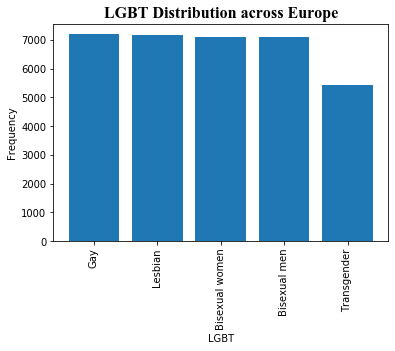

In [9]:
index = np.arange(5)
plt.bar(index, lgbt_occurence['Count'])
plt.xticks(index, lgbt_occurence['Outcome'], rotation = 'vertical')
plt.title('LGBT Distribution across Europe', fontname = 'Times New Roman', fontsize = 16)
plt.xlabel('LGBT')
plt.ylabel('Frequency')

In [10]:
# the bar chart revealed that the distribution of Gay, Lesbian, Bisexuals is nearly equal while that of Transgender is quite low
# Let's investigate LGBT by country
LgbtByCountry = lgbt.groupby('subset')
for LGBT, country_subset in LgbtByCountry:
    print(LGBT)

Bisexual men
Bisexual women
Gay
Lesbian
Transgender


In [11]:
#summary of Bisexual men
BisexualM = LgbtByCountry.get_group('Bisexual men').reset_index()
rp.summary_cat(BisexualM['CountryCode'])


,Variable,Outcome,Count,Percent
0,CountryCode,France,249,3.51
1,,Poland,249,3.51
2,,Belgium,249,3.51
3,,Portugal,249,3.51
4,,Ireland,249,3.51
5,,Sweden,249,3.51
6,,Spain,249,3.51
7,,Germany,249,3.51
8,,Average,249,3.51
9,,Czech Republic,248,3.49


In [12]:
# Belgium, Sweden, Poland, Germany, spain, Ireland, Portugal and France have the highest number of Bisexual men
#Summary of Bisexual women
BisexualW = LgbtByCountry.get_group('Bisexual women').reset_index()
rp.summary_cat(BisexualW['CountryCode'])

,Variable,Outcome,Count,Percent
0,CountryCode,Germany,249,3.50
1,,Finland,249,3.50
2,,Spain,249,3.50
3,,Average,249,3.50
4,,Poland,249,3.50
5,,Bulgaria,249,3.50
6,,Austria,249,3.50
7,,United Kingdom,249,3.50
8,,Slovakia,248,3.49
9,,Netherlands,248,3.49


In [13]:
# UK, Finland and Austria top the list of countries with Bisexual Women
# summary of Gay
Gay = LgbtByCountry.get_group('Gay').reset_index()
rp.summary_cat(Gay['CountryCode'])

,Variable,Outcome,Count,Percent
0,CountryCode,France,249,3.46
1,,Portugal,249,3.46
2,,Germany,249,3.46
3,,Denmark,249,3.46
4,,Finland,249,3.46
5,,Cyprus,249,3.46
6,,Spain,249,3.46
7,,Average,249,3.46
8,,Croatia,249,3.46
9,,Slovenia,249,3.46


In [14]:
# Again, Uk, France, Slovakia, Denmark, Greece... top the list of countries with highest number of gays
#summary of Lesbian
Lesbian = LgbtByCountry.get_group('Lesbian').reset_index()
rp.summary_cat(Lesbian['CountryCode'])

,Variable,Outcome,Count,Percent
0,CountryCode,France,249,3.47
1,,Ireland,249,3.47
2,,Finland,249,3.47
3,,Denmark,249,3.47
4,,Average,249,3.47
5,,Germany,249,3.47
6,,Italy,249,3.47
7,,Luxembourg,249,3.47
8,,Spain,249,3.47
9,,Sweden,249,3.47


In [15]:
# the number of lesbians is equally distributed among 18 countries including UK
# Summary of Transgender
Transgender = LgbtByCountry.get_group('Transgender').reset_index()
rp.summary_cat(Transgender['CountryCode'])

,Variable,Outcome,Count,Percent
0,CountryCode,France,188,3.46
1,,Austria,188,3.46
2,,Germany,188,3.46
3,,Denmark,188,3.46
4,,Finland,188,3.46
5,,Spain,188,3.46
6,,Average,188,3.46
7,,Croatia,188,3.46
8,,Italy,188,3.46
9,,Ireland,188,3.46


In [16]:
# Again, the number is equally distributed among 20 countries including the UK

lgbt.groupby('question_label')['subset'].describe()

,count,unique,top,freq
question_label,,,,
4 levels of being open about LGBT background *,580,5,Bisexual men,116
"All things considered, how satisfied would you say you are with your life these days? *",1412,5,Gay,290
Are you a parent or legal guardian of a child (or children)?,290,5,Bisexual men,58
Do any children (under the age of 18) live in your household?,290,5,Bisexual men,58
"Does your current partner know that you are L, G, B or T?",580,5,Bisexual men,116
"For each of the following types of discrimination, could you please specify whether, in your opinion, it is very rare, fairly rare, fairly widespread or very widespread in the country where you live?",1450,5,Gay,290
"Have you been open about you being L, G, B or T? *",870,5,Gay,174
"Have you ever moved to an EU country (and also taken up local residence) together with your same-sex partner, since you married or registered your partnership?",294,4,Gay,87
"In terms of your civil status in the country where you live, are you *",725,5,Gay,145


In [17]:
#Let's Investigate the following question (variables) with respect to LGBT
#1. You have received poorer services than others (eg in restaurants, shops) - In the last six months, in your day-to-day life, how often have any of the following things happened to you because you
# are or are assumed to be L,G,B,T 
#2. What best describes your current situation in the country where you live 
#3. For each of the following types of discrimination, could you please specify whether, in your opinion, it is very rare, fairly rare, 
# fairly widespread or very widespread in the country where you live?
#4. Is someone in the household a parent or legal guardian of a child (or children)?
#5. In your opinion, in the country where you live, how widespread is discrimination because a person is Gay?

In [18]:
lgbt.head()

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8,NaN
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34,NaN
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45,NaN
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9,NaN
4,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Don`t know,4,[0]


In [19]:
#firstly, I'll rename these questions with shorter names
Map = {'You have received poorer services than others (eg in restaurants, shops) - In the last six months, in your day-to-day life, how often have any of the following things happened to you because you are or are assumed to be L,G,B,T'
      : 'Services recieved',
      'What best describes your current situation in the country where you live *': 'Current Situation',
      'Is someone in the household a parent or legal guardian of a child (or children)?' : 'Parenting',
      'In your opinion, in the country where you live, how widespread is discrimination because a person is Gay?': 'Descrimination',
      'For each of the following types of discrimination, could you please specify whether, in your opinion, it is very rare, fairly rare, fairly widespread or very widespread in the country where you live?'
      : 'General descrimination'}

lgbt.replace(Map)

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8,NaN
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34,NaN
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45,NaN
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9,NaN
4,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Don`t know,4,[0]
...,...,...,...,...,...,...,...
34015,Average,Bisexual men,openness_cat4,4 levels of being open about LGBT background *,Very open,6,NaN
34016,Average,Transgender,openness_cat4,4 levels of being open about LGBT background *,Never Open,53,NaN
34017,Average,Transgender,openness_cat4,4 levels of being open about LGBT background *,Rarely Open,19,NaN
34018,Average,Transgender,openness_cat4,4 levels of being open about LGBT background *,Fairly open,12,NaN


In [20]:
#Investigating if LGBT are parents of child or children
parents = lgbt.loc[lgbt['question_label'] == 'Is someone in the household a parent or legal guardian of a child (or children)?']
rp.summary_cat(parents[['answer','subset']])

,Variable,Outcome,Count,Percent
0,answer,No,145,50.0
1,,Yes,145,50.0
2,subset,Bisexual men,58,20.0
3,,Lesbian,58,20.0
4,,Gay,58,20.0
5,,Bisexual women,58,20.0
6,,Transgender,58,20.0


In [21]:
# Out of the 290 the 290 respondents, 145 answered YES while 145 answered NO. The number is equally distributed among LGBT

#Investigating whether Gay are being descriminated against
Gay_desc = lgbt.loc[lgbt['question_label'] == 'In your opinion, in the country where you live, how widespread is discrimination because a person is Gay?']
rp.summary_cat(Gay_desc[['answer','subset']])

,Variable,Outcome,Count,Percent
0,answer,Fairly rare,145,20.0
1,,Very rare,145,20.0
2,,Very widespread,145,20.0
3,,Fairly widespread,145,20.0
4,,Don`t know,145,20.0
5,subset,Gay,145,20.0
6,,Bisexual women,145,20.0
7,,Transgender,145,20.0
8,,Bisexual men,145,20.0
9,,Lesbian,145,20.0


In [22]:
# Again there is no difference in the levels of descrimination against Gay 
# Investigating the Current situation of LGBT in the country they live
current_sit = lgbt.loc[lgbt['question_label'] == 'What best describes your current situation in the country where you live *']
rp.summary_cat(current_sit[['answer', 'subset']])

,Variable,Outcome,Count,Percent
0,answer,Have no relationship / do not have a partner,145,33.33
1,,Living together with a partner /spouse,145,33.33
2,,Involved in a relationship without living toge...,145,33.33
3,subset,Bisexual men,87,20.00
4,,Lesbian,87,20.00
5,,Gay,87,20.00
6,,Bisexual women,87,20.00
7,,Transgender,87,20.00


In [23]:
# a hundred and fourty five said they are living together with a partner/spouse, 145 said they are involved in a relationship
# without living together, 145 said they have no relationship/ do not have a partner

# Investigating the how LGBT were treated in public places in the last 6 months
service = lgbt.loc[lgbt['question_label'] == 'You have received poorer services than others (eg in restaurants, shops) - In the last six months, in your day-to-day life, how often have any of the following things happened to you because you are or are assumed to be L,G,B,T']
rp.summary_cat(service[['answer', 'subset']])

,Variable,Outcome,Count,Percent
0,answer,2-5 times in the last six months,145,20.0
1,,Happened only once in the last six months,145,20.0
2,,Don`t know,145,20.0
3,,6 times or more in the last six months,145,20.0
4,,Never happened in the last sixth months,145,20.0
5,subset,Gay,145,20.0
6,,Bisexual women,145,20.0
7,,Transgender,145,20.0
8,,Bisexual men,145,20.0
9,,Lesbian,145,20.0


In [24]:
# Again there is no difference in the levels

In [25]:
lgbt.head()

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8,NaN
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34,NaN
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45,NaN
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9,NaN
4,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Don`t know,4,[0]


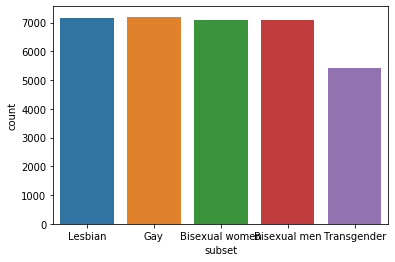

In [30]:
sns.countplot(x = 'subset', data = lgbt)